<a href="https://www.kaggle.com/code/hipparkarrahul18/ivy-league-admit-predictor?scriptVersionId=201234416" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Defining Problem Statement and Analysing basic metrics

**Context**

Jamboree has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.
They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.

**How can you help here?**

Your analysis will help Jamboree in understanding what factors are important in graduate admissions and how these factors are interrelated among themselves. It will also help predict one's chances of admission given the rest of the variables.

**Column Profiling:**

* Serial No. (Unique row ID)
* GRE Scores (out of 340)
* TOEFL Scores (out of 120)
* University Rating (out of 5)
* Statement of Purpose and Letter of Recommendation Strength (out of 5)
* Undergraduate GPA (out of 10)
* Research Experience (either 0 or 1)
* Chance of Admit (ranging from 0 to 1)

## Importing Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualisation library
import seaborn as sns #data visualisation library built on the top of the matplotlib
import plotly.graph_objs as go
import plotly.subplots as sp
from plotly.subplots import make_subplots
import plotly.express as px
import datetime as dt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/jamboree-admission/Jamboree_Admission.csv


## Importing Dataset

In [2]:
df=pd.read_csv('/kaggle/input/jamboree-admission/Jamboree_Admission.csv')
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [3]:
df.drop('Serial No.',axis=1,inplace=True)

In [4]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


## Basic Analysis

### Shape of the Data

In [5]:
df.shape

(500, 8)

**Analysis:**

1. Shape of dataframe is 500 * 9
1. Number of rows = 500
1. Number of columns = 8

### First 5 rows

In [6]:
df.head(5)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


### Columns in a data frame

In [7]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

### Data-type of all attributes or concise summary

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


**Inference**:

1. All columns in a dataframe are of numeric type.
2. Since the dataset lacks categorical attributes, there is no necessity for feature encoding to convert them into numeric values for the linear regression model. All variables in the dataset are already in a numeric format, aligning with the model's requirements.
3. There are no missing values in a given data frame.
4. Since 'GRE Score' and 'TOEFL Score' columns are on different scales than the others, applying feature scaling is necessary. This ensures uniform scales across all columns, preventing data bias in predictions for the linear regression model.

### Statistical Summary

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


### Missing Values Detection

In [10]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

**Inference**:

There are no missing values in a given data frame.

### Unique Values

In [11]:
df.nunique()

GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 184
Research               2
Chance of Admit       61
dtype: int64

In [12]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

# EDA

## Univariate Analysis

### Distribution of GRE Scores, TOEFL Scores and CGPA

In [13]:

colors = ['#9FA0FF', '#DAB6FC','#86CB92']

# Create histogram for GRE Score
hist_gre = go.Histogram(x=df['GRE Score'], marker_color=colors[0])

# Create histogram for TOEFL Score
hist_toefl = go.Histogram(x=df['TOEFL Score'], marker_color=colors[1])

# Create histogram for CGPA
hist_CGPA = go.Histogram(x=df['CGPA'], marker_color=colors[2])

# Create subplots
fig = make_subplots(rows=1, cols=3, subplot_titles=("GRE Score Distribution", "TOEFL Score Distribution","CGPA Distribution"))

# Add histograms to subplots
fig.add_trace(hist_gre, row=1, col=1)
fig.add_trace(hist_toefl, row=1, col=2)
fig.add_trace(hist_CGPA, row=1, col=3)


# Update layout
fig.update_layout(barmode='overlay', height=600, width=1400,showlegend=False)

# Show plot
fig.show()

**Insights**:

- The majority of students at Jamboree boast GRE Scores of 324 or 325, underscoring Jamboree's excellence in GRE coaching.
- A significant portion of students at Jamboree achieves TOEFL scores of 104 or 105, reflecting the institution's proficiency in TOEFL preparation.
- The predominant CGPA among students at Jamboree is 8.5, indicating a noteworthy academic standard within the institution.

### Distribution of SOP and LOR ratings

In [14]:
colors = ["#b9e769","#f1c453"]

# Create histogram for GRE Score
bar_LOR = go.Bar(x=df['LOR '].value_counts().index,y=df['LOR '].value_counts(),marker_color=colors[0])

# Create histogram for TOEFL Score
bar_SOP = go.Bar(x=df['SOP'].value_counts().index,y=df['SOP'].value_counts(), marker_color=colors[1])

# Create subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=("LOR Ratings Distribution", "SOP Ratings Distribution"))

# Add histograms to subplots
fig.add_trace(bar_LOR, row=1, col=1)
fig.add_trace(bar_SOP, row=1, col=2)

# Update layout
fig.update_layout(barmode='overlay', height=600, width=1400,showlegend=False)

# Show plot
fig.show()

In [15]:
df['LOR '].value_counts(normalize=True)*100

LOR 
3.0    19.8
4.0    18.8
3.5    17.2
4.5    12.6
2.5    10.0
5.0    10.0
2.0     9.2
1.5     2.2
1.0     0.2
Name: proportion, dtype: float64

In [16]:
df['SOP'].value_counts(normalize=True)*100

SOP
4.0    17.8
3.5    17.6
3.0    16.0
2.5    12.8
4.5    12.6
2.0     8.6
5.0     8.4
1.5     5.0
1.0     1.2
Name: proportion, dtype: float64

**Insights**:
1. Nearly one-fifth (19.8%) of the students at Jamboree possess LOR ratings of 3, illustrating a significant proportion within the institution's student body.
2. A notable proportion of students at Jamboree, specifically 17.8%, exhibit SOP ratings of 3.5, underscoring a significant trend within the institution's student demographics.

## Multivariate Analysis

### CGPA vs Admit Chances

In [17]:
import plotly.express as px

fig = px.scatter(
     df,x = 'CGPA', y='Chance of Admit ', color= 'University Rating',opacity=0.65
)

fig.update_layout(title='CGPA vs Admit Chances',
                   xaxis_title='CGPA',
                   yaxis_title='Admit Chances')
fig.show()

**Insight**:

- The relationship between the features 'CGPA' and 'Chances of Admit' exhibits a strong linear correlation. As the CGPA increases, there is a noticeable and significant rise in the chances of admission.

- Based on the observed trend, students with a CGPA of 8.5 or higher stand a favorable chance of securing admission from universities rated 3, 4, and 5.

- Conversely, students with CGPA scores between 7 and 8 are likely to encounter reduced admission prospects, particularly from universities rated 1 and 2.

### GRE Scores VS Admit Chances

In [18]:
import plotly.express as px

fig = px.scatter(
     df,x = 'GRE Score', y='Chance of Admit ', color= 'University Rating',opacity=0.65
)

fig.update_layout(title='GRE Scores vs Admit Chances',
                   xaxis_title='GRE scores',
                   yaxis_title='Admit Chances')
fig.show()

**Insights**:

* Student having GRE scores between 330 and 340:
    - Universities having rating 3,4 and 5 : Admit chances > 90 %
    - Univerisities having rating 1 and 2: Admit chances are between 80% and 90 %
* Students having GRE scores between 320 and 330:
    - Universities having rating 5: Admit chances are between 70% and 95%
    - Universities having rating 3 and 4 : Admit chances are between 50% and 90%
    - Universities having rating 1 and 2: Admit chances are between 50% and 80% %
* Students having GRE scores b/w 300 and 320:
    - Universities having rating 5 : Admit chances are between 60% and 80%
    - Universities having rating 3 and 4 : Admit chances are between 40% and 80%
    - Universities having rating 1 and 2 : Admit chances are between 35% and 80%

### TOEFL scores VS Admit Chances

In [19]:
import plotly.express as px

fig = px.scatter(
     df,x = 'TOEFL Score', y='Chance of Admit ', color= 'University Rating',opacity=0.65
)

fig.update_layout(title='TOEFL Scores vs Admit Chances',
                   xaxis_title='TOEFL scores',
                   yaxis_title='Admit Chances')
fig.show()

**Insights**:

* Student having TOEFL scores between 110 and 120:
    - Universities having rating 5 : Admit chances are between 85% and 100%
    - Universities having rating 4 : Admit chances are between 70 and  95%
    - Universities having rating 3 : Admit chances are between 65% and 90% 
    - Univerisities having rating 1 and 2: Admit chances are between 60% and 90%
    
* Students having TOEFL scores between 100 and 110:
    - Universities having rating 5 : Admit chances are between 75% and 90%
    - Universities having rating 4 : Admit chances are between 50 and  85%
    - Universities having rating 3 : Admit chances are between 40% and 85% 
    - Univerisities having rating 1 and 2: Admit chances are between 35% and 70%
    
   
* Students having TOEFL scores < 100:
     - There are no data points related to the university ratings 4 and 5.
     - Universities having rating 3 : Admit chances are between 40 and  80%
     - Universities having rating 1 and 2 : Admit chances are between 30% and 75% 
     


### SOP ratings vs Admit Chances

In [20]:
import plotly.express as px

fig = px.scatter(
     df,x = 'SOP', y='Chance of Admit ',color= 'University Rating',opacity=0.65
)

fig.update_layout(title='SOP Ratings vs Admit Chances',
                   xaxis_title='SOP Ratings',
                   yaxis_title='Admit Chances')
fig.show()

**Insights**:

* Student having SOP ratings between 3 and 5:
    - Universities having rating 5 : Admit chances are between 80% and 100%
    - Universities having rating 4 : Admit chances are between 50 and  95%
    - Universities having rating 3 : Admit chances are between 50% and 80% 
    - Universities having rating 2:  Admit chances are between 40% and 80%
    - Universities having rating 1:  Admit chances are between 35% and 70%
    
    
* Students having SOP ratings < 3:
    - Universities having rating 5 : No associated datapoint
    - Universities having rating 4 : Admit chances are between 40% and 90%
    - Univerisities having rating 1, 2 and 3: Admit chances are between 35% and 80%
    
 

### LOR Ratings vs Admit Chances

In [21]:
import plotly.express as px

fig = px.scatter(
     df,x = 'LOR ', y='Chance of Admit ',color= 'University Rating',opacity=0.65
)

fig.update_layout(title='LOR Ratings vs Admit Chances',
                   xaxis_title='LOR Ratings',
                   yaxis_title='Admit Chances')
fig.show()

**Insights**:

* Student having LOR ratings between 3 and 5:
    - Universities having rating 5 : Admit chances are between 60% and 100%
    - Universities having rating 4 : Admit chances are between 60 and  95%
    - Universities having rating 3 : Admit chances are between 40% and 85% 
    - Universities having rating 2:  Admit chances are between 30% and 80%
    - Universities having rating 1:  Admit chances are between 50% and 70%
    
    
* Students having LOR ratings < 3:
    - Universities having rating 5 : No associated datapoint
    - Universities having rating 4 : Admit chances are between 40% and 85%
    - Universities having rating 3 : Admit chances are between 40% and 80%
    - Univerisities having rating 1 and 2 : Admit chances are between 35% and 75%

### Heatmap and Correlation

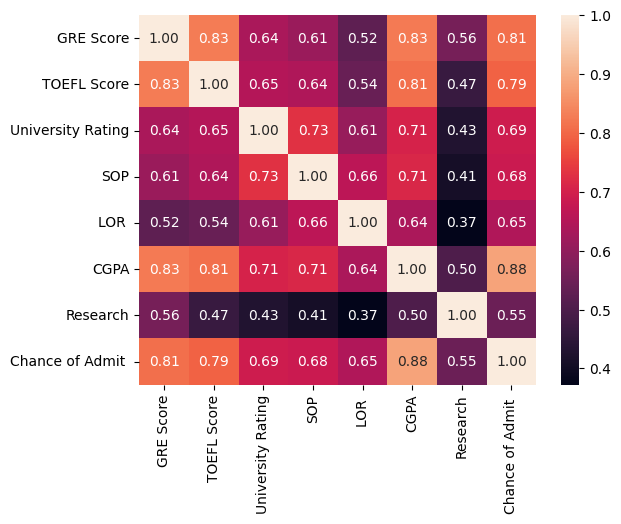

In [22]:
sns.heatmap(df.corr(),annot=True,cmap='rocket',fmt='.2f')
plt.show()

**Inference**:
There is high correlation among 'GRE score', 'TOEFL Score', 'CGPA' and 'Chance of Admit'. Same has been observed in the above scatter plots.

# Data Preprocessing

## Duplicate Values Check

In [23]:
df[df.duplicated()]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit


In [24]:
print(df[df.duplicated()])

Empty DataFrame
Columns: [GRE Score, TOEFL Score, University Rating, SOP, LOR , CGPA, Research, Chance of Admit ]
Index: []


**Inference**:

There are no duplicate values in the dataset.

## Handling Outliers

In [25]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

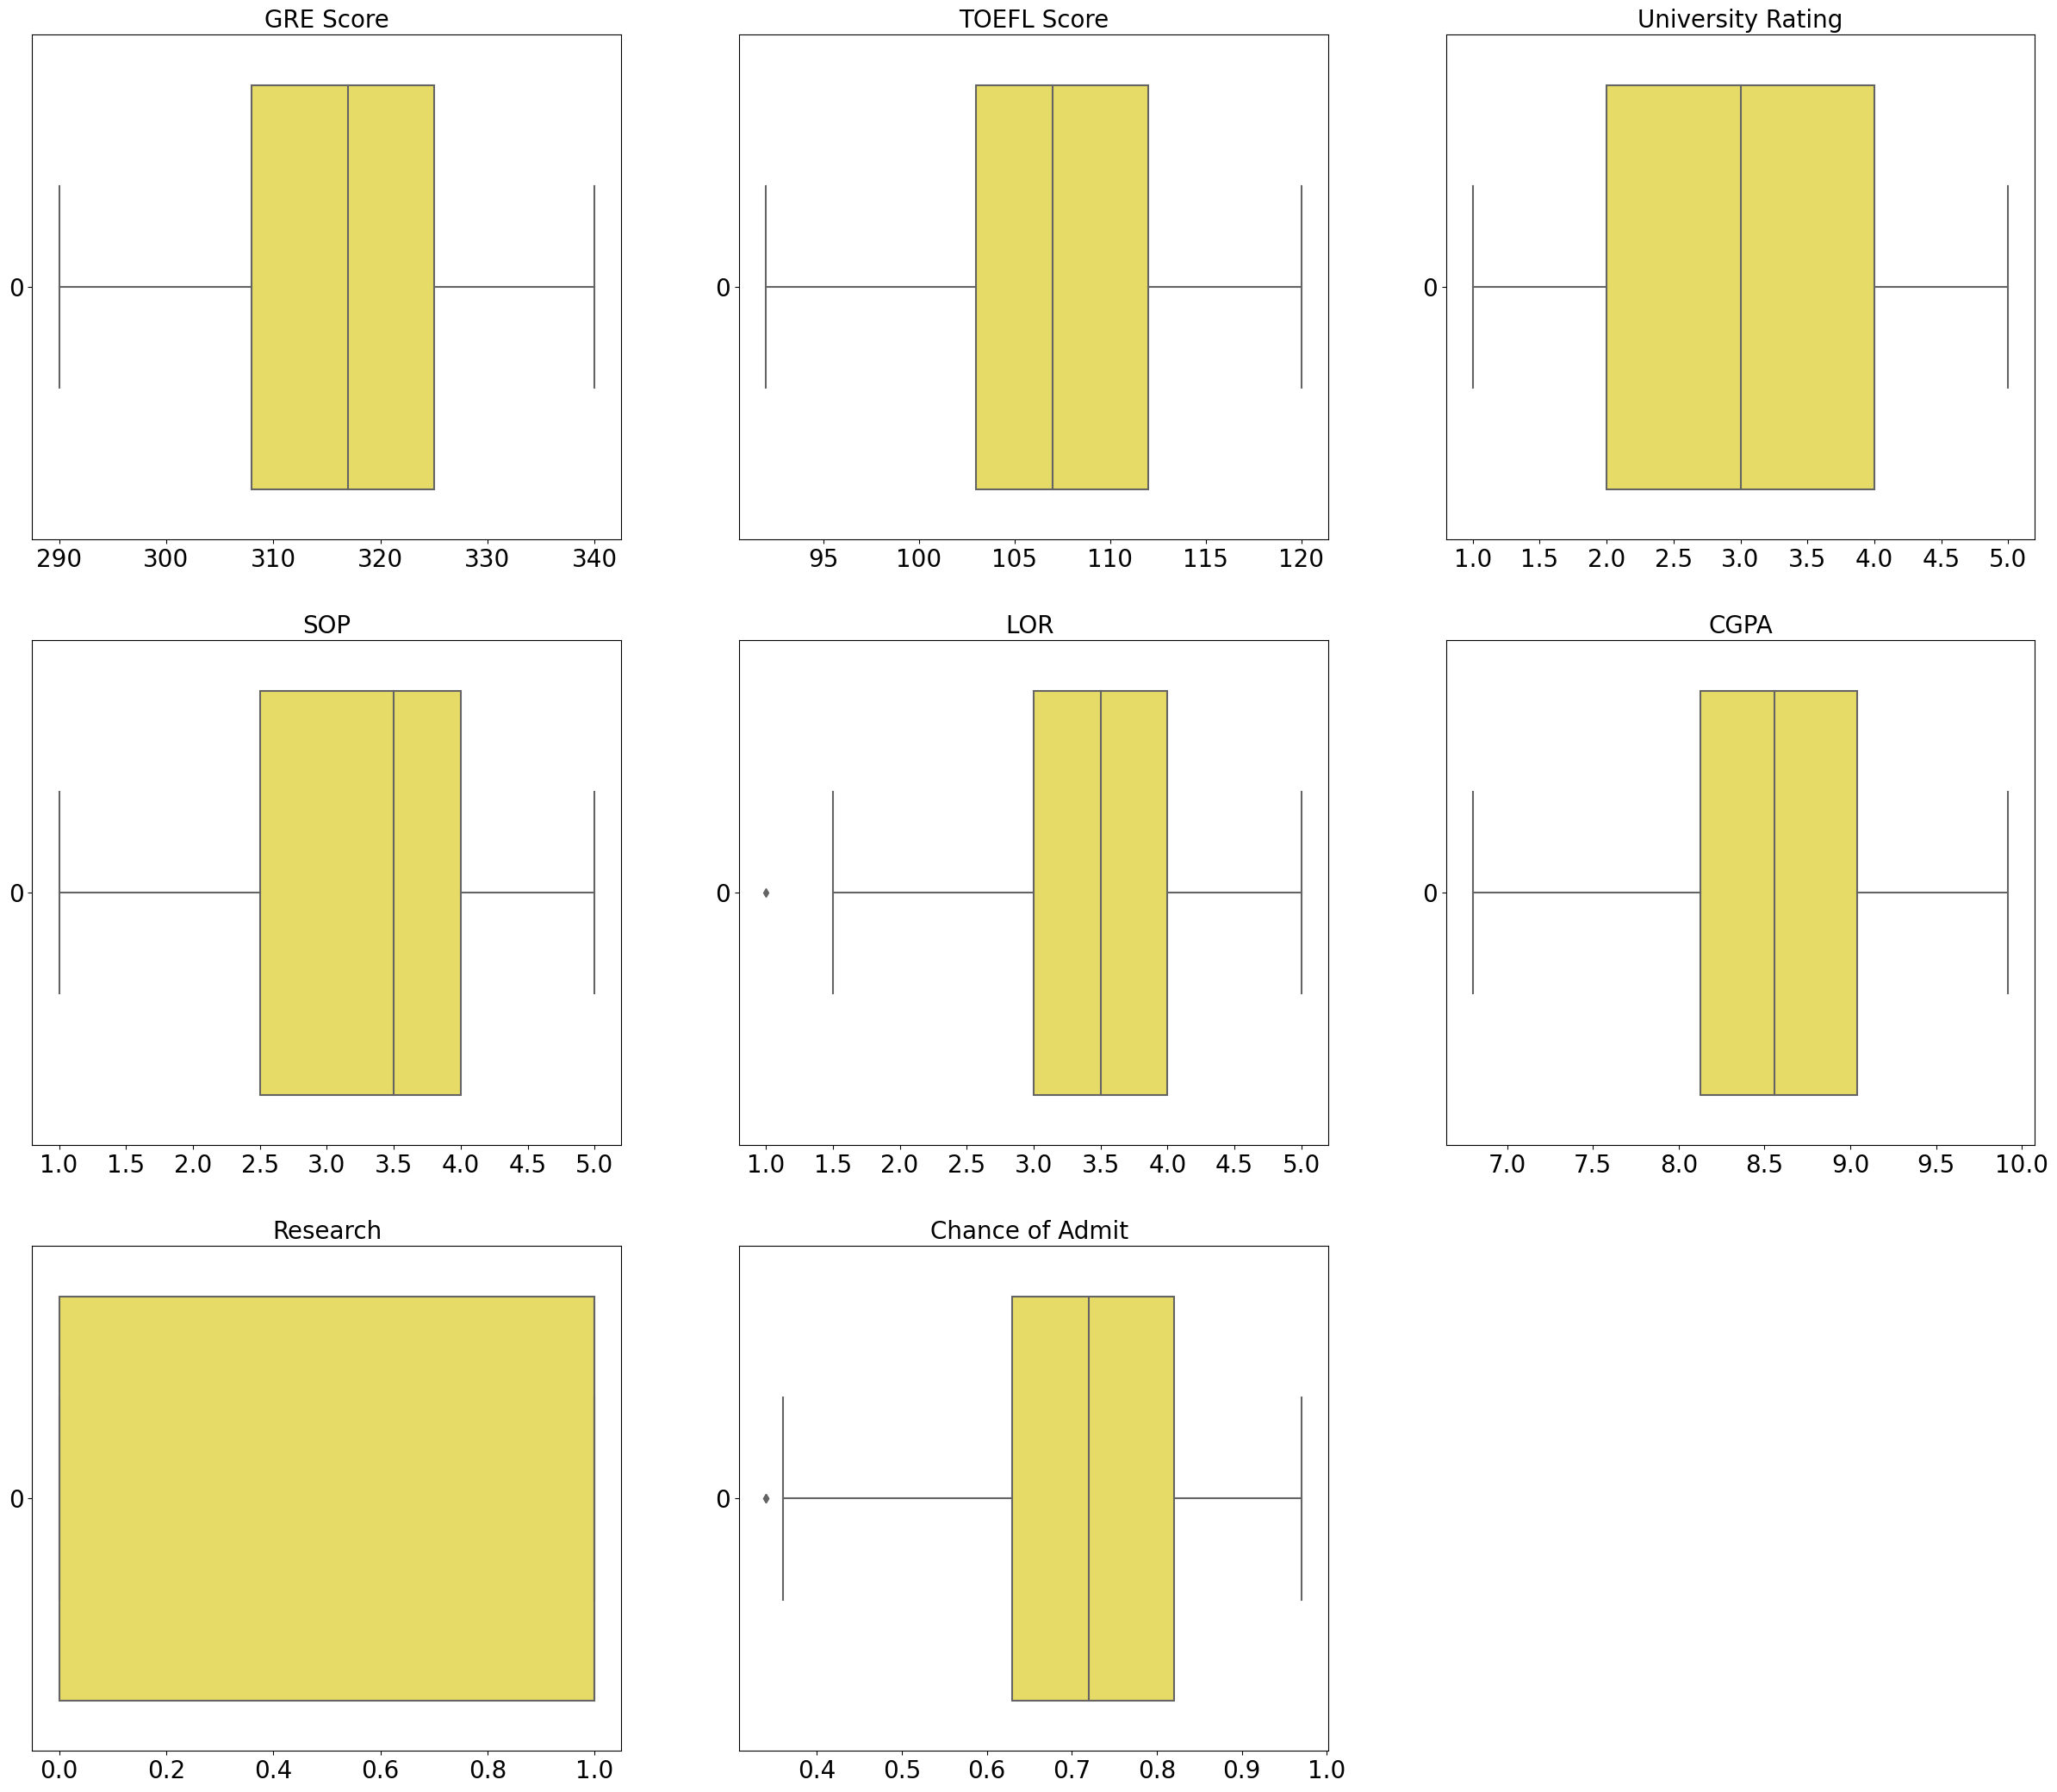

In [26]:
plt.figure(figsize=(30,35))
for idx,i in enumerate(df.columns):
    plt.subplot(4,3,idx+1)
    sns.boxplot(df[i],orient="h",color='#FCEC52')
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.title(f"{i}",fontsize=20)
plt.show()

**Inference**:

No outliers are present in any of the features, indicating that the dataset exhibits a consistent and uniform distribution across its various attributes.

## Handling Missing Values

**Checking for Missing Values**

In [27]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

**Inference**:

There are no missing values in a given data frame.

## Data Preparation

### Creating Vector of Independent Features

In [28]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [29]:
X=df.drop('Chance of Admit ',axis=1)
X


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


### Creating Vector of dependent feature

In [30]:
y=df['Chance of Admit ']
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

### Splitting Data into train and test sets

**Generaliztion of Machine Learning Model:**

* Generalization in machine learning refers to the ability of a model to perform well on unseen data or new data .
* By splitting data into train and test set we can evaluate how well model generalizes on unseen data by evaluating its performance on test set.


In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [32]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
227,312,110,2,3.5,3.0,8.53,0
417,316,103,3,3.5,2.0,7.68,0
203,334,120,5,4.0,5.0,9.87,1
126,323,113,3,4.0,3.0,9.32,1
329,297,96,2,2.5,1.5,7.89,0
...,...,...,...,...,...,...,...
106,329,111,4,4.5,4.5,9.18,1
270,306,105,2,2.5,3.0,8.22,1
348,302,99,1,2.0,2.0,7.25,0
435,309,105,2,2.5,4.0,7.68,0


In [33]:
X_test

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
361,334,116,4,4.0,3.5,9.54,1
73,314,108,4,4.5,4.0,9.04,1
374,315,105,2,2.0,2.5,7.65,0
155,312,109,3,3.0,3.0,8.69,0
104,326,112,3,3.5,3.0,9.05,1
...,...,...,...,...,...,...,...
220,313,103,3,4.0,4.0,8.75,0
176,329,119,4,4.5,4.5,9.16,1
320,317,106,3,4.0,3.5,8.50,1
153,324,105,3,3.0,4.0,8.75,0


In [34]:
y_train

227    0.64
417    0.52
203    0.97
126    0.85
329    0.43
       ... 
106    0.87
270    0.72
348    0.57
435    0.55
102    0.62
Name: Chance of Admit , Length: 375, dtype: float64

In [35]:
y_test

361    0.93
73     0.84
374    0.39
155    0.77
104    0.74
       ... 
220    0.76
176    0.90
320    0.75
153    0.79
231    0.74
Name: Chance of Admit , Length: 125, dtype: float64

### Feature Scaling

For Feature Scaling we will use Standard Scaler. Standard Scaler Scales the values of a numeric featu to have 0 mean and unit standar deviation.

Formulla = **Xscaled= (X-mean)/(standard deviation)**







**Important Note:** : Feature scaling should be performed after the train-test split to avoid any kind of data leakage.

In [36]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train= pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,-0.431262,0.440582,-0.959027,0.119633,-0.515447,-0.086517,-1.116024
1,-0.066815,-0.705630,-0.090343,0.119633,-1.601362,-1.500740,-1.116024
2,1.573197,2.078028,1.647025,0.623702,1.656382,2.142963,0.896038
3,0.570967,0.931816,-0.090343,0.623702,-0.515447,1.227878,0.896038
4,-1.797939,-1.851843,-0.959027,-0.888507,-2.144320,-1.151344,-1.116024
...,...,...,...,...,...,...,...
370,1.117638,0.604327,0.778341,1.127772,1.113425,0.994947,0.896038
371,-0.977933,-0.378141,-0.959027,-0.888507,-0.515447,-0.602292,0.896038
372,-1.342380,-1.360609,-1.827711,-1.392576,-1.601362,-2.216170,-1.116024
373,-0.704598,-0.378141,-0.959027,-0.888507,0.570467,-1.500740,-1.116024


**Scaling test data as well**

In [37]:
X_test= pd.DataFrame(scaler.fit_transform(X_test),columns=X_test.columns)
X_test

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.509862,1.535082,0.767701,0.658591,-0.012837,1.598254,0.857969
1,-0.139179,0.194399,0.767701,1.166763,0.522035,0.783018,0.857969
2,-0.056727,-0.308357,-1.025993,-1.374097,-1.082581,-1.483338,-1.165543
3,-0.304083,0.361984,-0.129146,-0.357753,-0.547709,0.212353,-1.165543
4,0.850246,0.864740,-0.129146,0.150419,-0.547709,0.799322,0.857969
...,...,...,...,...,...,...,...
120,-0.221631,-0.643528,-0.129146,0.658591,0.522035,0.310181,-1.165543
121,1.097602,2.037837,0.767701,1.166763,1.056908,0.978674,0.857969
122,0.108177,-0.140772,-0.129146,0.658591,-0.012837,-0.097437,0.857969
123,0.685342,-0.308357,-0.129146,-0.357753,0.522035,0.310181,-1.165543


# Linear Regression

## Model Building

### Linear regression using sklearn

#### Training Regression Model

In [38]:
from sklearn.linear_model import LinearRegression
linear_regressor =  LinearRegression()
linear_regressor.fit(X_train, y_train)

LinearRegression()

In [39]:
linear_regressor.coef_

array([0.02376292, 0.02022226, 0.00272927, 0.00120361, 0.01570396,
       0.07021723, 0.01199466])

In [40]:
linear_regressor.intercept_

0.7236800000000001

#### Display model coefficients and intercept with column names

In [41]:
linear_df=pd.DataFrame(linear_regressor.coef_.reshape(1,-1),columns=X_train.columns)
linear_df['intercept']= linear_regressor.intercept_
linear_df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,intercept
0,0.023763,0.020222,0.002729,0.001204,0.015704,0.070217,0.011995,0.72368


#### Predicting new or unseen data using a regression model

In [42]:
y_pred = linear_regressor.predict(X_test)
y_pred

array([0.91580391, 0.80127389, 0.57650524, 0.71532048, 0.81901595,
       0.86258285, 0.48881507, 0.6602502 , 0.82943673, 0.8125425 ,
       0.72379164, 0.73178344, 0.65619282, 0.93372553, 0.82778227,
       0.52032869, 0.83669932, 0.60541756, 0.54467234, 0.58188964,
       0.67312125, 0.56214001, 0.72681964, 0.7955512 , 0.78258283,
       0.61279312, 0.95207048, 0.84754239, 0.63344758, 0.74931632,
       0.56417461, 0.73547366, 0.55336389, 0.86539292, 0.6598877 ,
       0.74114452, 0.56330556, 0.95898179, 0.65324789, 0.7157148 ,
       0.96671243, 0.58218968, 0.6757906 , 0.8601033 , 0.9384984 ,
       0.58682267, 0.95846419, 0.84012016, 0.79455359, 0.92833847,
       0.89195422, 0.5725662 , 0.71209234, 0.53224496, 0.95361377,
       0.59731884, 0.9553671 , 0.74428213, 0.67457222, 0.50989038,
       0.63926217, 0.68737996, 0.60742358, 0.59849923, 0.45003217,
       0.59596784, 0.87025361, 0.89939914, 0.66499753, 0.71110666,
       0.62528245, 0.78743637, 0.69280979, 0.56984207, 0.56432

#### Evaluation Metrics 

**Coefficient of Determination : R²**

In [43]:
from sklearn.metrics import r2_score
r_squared=r2_score(y_test,y_pred)
r_squared

0.815876471210213

**Adjusted R²**

As we do not have any built-in function to calculate the Adjusted R² that's why we have to create our own method to calculate adjusted R².

In [44]:
def adj_r2_score(r_squared,n,d):
    # n is no. of sample
    # d is no. of features
    # r_squared is standard R²
    adj_r2 = 1 - (((1-r_squared)*(n-1))/(n-d-1))
    return adj_r2

In [45]:
adj_r2_score(r_squared,len(y_test),X_test.shape[1])

0.8048605335903112

**MAE , MSE, RMSE**

In [46]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("Mean Absolute Error (MAE) :" , mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE) :" , mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE) :" , np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error (MAE) : 0.04257773338350027
Mean Squared Error (MSE) : 0.003594414160996728
Root Mean Squared Error (RMSE) : 0.059953433271137425


### Lasso Regression

### Training Regression Model

**What is Lasso Regression?**

* Lasso (Least Absolute Shrinkage and Selection Operator) regularization is a technique used in regression analysis to improve the predictive accuracy and interpretability of the model.
* Also known as L1 regularization.
* Adds the absolute values of the coefficients as a penalty term to the loss function. Mathematically, it adds the sum of the absolute values of the coefficients to the loss.
* Lasso regularization has a unique property: it can drive some of the coefficients to exactly zero. This feature makes it useful for feature selection, as it effectively removes irrelevant features from the model.


**Equation**:

**$ \text{minimize } \frac{1}{2n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \alpha \sum_{j=1}^{d} |w_j| $
**

**Significane of Alpha (α) or Lagrange multiplier**

1. Case 1:  α=0 

    * There will be no regularization term.
    * Model will overfit.
  
2. Case 2:  α=∞  (large +ve value):
    * As value of lambda is large, the magnitude of squared loss term is negligible.
    * Weightage of regularization term will increase
    * It'll try to push all the  wj 's to zero.
    * Model will underfit.

Hence, it is very important to find optimal value of λ , as it is used to control underfitting and overfitting. Here we will use grid search to find optimal values of the lambda.

In [47]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# define range of lambda values to search

alphas = [0.0001, 0.001, 0.01, 0.1, 0.5, 1, 5, 10, 50, 100]

# creating a lasso regression model

lasso = Lasso()

# Perform grid search for hyperparameter tuning
param_grid= {'alpha':alphas}
lasso_grid = GridSearchCV(estimator=lasso,param_grid=param_grid, cv=5)
lasso_grid.fit(X_train,y_train)

# finding the optimal value for alpha from the grid search

optimal_alpha = lasso_grid.best_params_['alpha']

# create lasso regression model using the optimal value of the alpha

lasso_regressor=Lasso(alpha=optimal_alpha)

#Train the model

lasso_regressor.fit(X_train,y_train)



Lasso(alpha=0.001)

In [48]:
lasso_regressor.coef_

array([0.02371301, 0.01988762, 0.00255286, 0.00099401, 0.01524138,
       0.07036959, 0.01142532])

In [49]:
lasso_regressor.intercept_

0.7236800000000001

#### Display model coefficients and intercept with column names

In [50]:
lasso_df=pd.DataFrame(lasso_regressor.coef_.reshape(1,-1),columns=X_train.columns)
lasso_df['intercept']= lasso_regressor.intercept_
lasso_df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,intercept
0,0.023713,0.019888,0.002553,0.000994,0.015241,0.07037,0.011425,0.72368


#### Predicting new or unseen data using a regression model

In [51]:
y_pred_lasso = lasso_regressor.predict(X_test)
y_pred_lasso

array([0.91470234, 0.80022513, 0.57801865, 0.7162616 , 0.81856206,
       0.86135132, 0.49120157, 0.66129848, 0.82873138, 0.81127213,
       0.7246147 , 0.73261897, 0.65619996, 0.93187341, 0.827491  ,
       0.52276014, 0.8354133 , 0.60594062, 0.54688615, 0.58165387,
       0.67253606, 0.56307943, 0.72617856, 0.79469703, 0.78214936,
       0.61348225, 0.94975902, 0.84624218, 0.63473615, 0.74823499,
       0.56555346, 0.73660215, 0.55539765, 0.863933  , 0.65952186,
       0.74067615, 0.5655234 , 0.95668763, 0.65261966, 0.71550166,
       0.96484879, 0.58265397, 0.67596277, 0.8584906 , 0.93709356,
       0.58890617, 0.95666407, 0.83869881, 0.79335054, 0.92613815,
       0.89005069, 0.57377513, 0.71180013, 0.53350127, 0.95138232,
       0.59831759, 0.95430953, 0.74495677, 0.67515666, 0.5108978 ,
       0.64019903, 0.68720986, 0.60927804, 0.598876  , 0.45274508,
       0.59643746, 0.86868803, 0.8974702 , 0.66611339, 0.71239441,
       0.62536756, 0.78677517, 0.69441396, 0.57103448, 0.56669

#### Evaluation Metrics

In [52]:
print("R-Squared :", r2_score(y_test, y_pred_lasso))
print('Adjusted R-Squared:', adj_r2_score(r2_score(y_test, y_pred_lasso),len(y_test), X_test.shape[1]))
print("Mean Absolute Error (MAE) :" , mean_absolute_error(y_test, y_pred_lasso))
print("Mean Squared Error (MSE) :" , mean_squared_error(y_test, y_pred_lasso))
print("Root Mean Squared Error (RMSE) :" , np.sqrt(mean_squared_error(y_test, y_pred_lasso)))

R-Squared : 0.8160209788108161
Adjusted R-Squared: 0.8050136869447966
Mean Absolute Error (MAE) : 0.042392253658649605
Mean Squared Error (MSE) : 0.003591593119224427
Root Mean Squared Error (RMSE) : 0.05992990171212053


### Ridge Regression

#### Training Model

**What is Ridge Regression?**

* L2 regularization, also known as Ridge regularization, adds the squared values of the coefficients as a penalty term to the loss function. Mathematically, it adds the sum of the squared values of the coefficients to the loss function.
* Unlike Lasso regularization, Ridge regularization does not drive coefficients to zero but shrinks them towards zero. This helps in reducing the magnitude of the coefficients and, consequently, the model's complexity.

**Equation**:

$ \text{minimize } \frac{1}{2n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \alpha \sum_{j=1}^{d} w_j^2 $


In [53]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# define range of lambda values to search

alphas = [0.0001, 0.001, 0.01, 0.1, 0.5, 1, 5, 10, 50, 100]

# creating a lasso regression model

ridge = Ridge()

# Perform grid search for hyperparameter tuning
param_grid= {'alpha':alphas}
ridge_grid = GridSearchCV(estimator=ridge,param_grid=param_grid, cv=5)
ridge_grid.fit(X_train,y_train)

# finding the optimal value for alpha from the grid search

optimal_alpha = ridge_grid.best_params_['alpha']

# create lasso regression model using the optimal value of the alpha

ridge_regressor=Ridge(alpha=optimal_alpha)

#Train the model

ridge_regressor.fit(X_train,y_train)

Ridge(alpha=5)

In [54]:
ridge_regressor.coef_

array([0.02457017, 0.02075181, 0.00335391, 0.00196485, 0.01586431,
       0.06714403, 0.01200416])

In [55]:
ridge_regressor.intercept_

0.7236800000000001

#### Display model coefficients and intercept with column names

In [56]:
ridge_df=pd.DataFrame(ridge_regressor.coef_.reshape(1,-1),columns=X_train.columns)
ridge_df['intercept']= ridge_regressor.intercept_
ridge_df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,intercept
0,0.02457,0.020752,0.003354,0.001965,0.015864,0.067144,0.012004,0.72368


#### Predicting new or unseen data using a regression model

In [57]:
y_pred_ridge = ridge_regressor.predict(X_test)
y_pred_ridge

array([0.91391085, 0.80031768, 0.57898321, 0.7141622 , 0.81765792,
       0.86193922, 0.48860351, 0.65936927, 0.82659968, 0.81216782,
       0.72411457, 0.73092747, 0.65901854, 0.93371262, 0.82526179,
       0.51960787, 0.83760159, 0.60481101, 0.54413897, 0.58355109,
       0.67346081, 0.56415135, 0.72657539, 0.79556803, 0.78255807,
       0.61254837, 0.95137028, 0.84758126, 0.63384341, 0.75009245,
       0.56586747, 0.73428319, 0.55460133, 0.86422634, 0.66211435,
       0.74122001, 0.56174974, 0.95822321, 0.65434747, 0.71576345,
       0.9649813 , 0.58275206, 0.67476752, 0.8601911 , 0.93717252,
       0.58566812, 0.95695548, 0.84019481, 0.79543721, 0.92783766,
       0.89079432, 0.57332824, 0.71310553, 0.53391414, 0.95328576,
       0.60112122, 0.95250403, 0.74383443, 0.67343712, 0.51147461,
       0.63714773, 0.68632024, 0.60631401, 0.60280207, 0.45046778,
       0.59964792, 0.86944022, 0.89901588, 0.66417793, 0.70950824,
       0.62542801, 0.78743973, 0.69087772, 0.57226018, 0.56213

#### Evaluation Metrics

In [58]:
print("R-Squared :", r2_score(y_test, y_pred_ridge))
print('Adjusted R-Squared:', adj_r2_score(r2_score(y_test, y_pred_ridge),len(y_test), X_test.shape[1]))
print("Mean Absolute Error (MAE) :" , mean_absolute_error(y_test, y_pred_ridge))
print("Mean Squared Error (MSE) :" , mean_squared_error(y_test, y_pred_ridge))
print("Root Mean Squared Error (RMSE) :" , np.sqrt(mean_squared_error(y_test, y_pred_ridge)))

R-Squared : 0.8160899153520061
Adjusted R-Squared: 0.8050867478944339
Mean Absolute Error (MAE) : 0.04262629897672166
Mean Squared Error (MSE) : 0.0035902473570532775
Root Mean Squared Error (RMSE) : 0.05991867285791031


### Linear Regression using Statsmodel library

- Adjusted R-squared reflects the fit of the model. R-squared values range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.
- const coefficient is your Y-intercept. It means that if both the Interest_Rate and Unemployment_Rate coefficients are zero, then the expected output (i.e., the Y) would be equal to the const coefficient.
- Interest_Rate coefficient represents the change in the output Y due to a change of one unit in the interest rate (everything else held constant)
- Unemployment_Rate coefficient represents the change in the output Y due to a change of one unit in the unemployment rate (everything else held constant)
- std err reflects the level of accuracy of the coefficients. The lower it is, the higher is the level of accuracy
- P >|t| is your p-value. A p-value of less than 0.05 is considered to be statistically significant
- Confidence Interval represents the range in which our coefficients are likely to fall (with a likelihood of 95%)


#### Training Model

In [59]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
sm_regressor = sm.OLS(y_train.values, X_train_sm).fit()
print(sm_regressor.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     242.7
Date:                Tue, 15 Oct 2024   Prob (F-statistic):          1.72e-133
Time:                        06:24:55   Log-Likelihood:                 525.52
No. Observations:                 375   AIC:                            -1035.
Df Residuals:                     367   BIC:                            -1004.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7237      0.00

#### Model interpretability using stats model

In [60]:
print(sm_regressor.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     242.7
Date:                Tue, 15 Oct 2024   Prob (F-statistic):          1.72e-133
Time:                        06:24:55   Log-Likelihood:                 525.52
No. Observations:                 375   AIC:                            -1035.
Df Residuals:                     367   BIC:                            -1004.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7237      0.00

**Inference**:

* We look at the P>|t| column. The null hypothesis tells us that the coefficent of that dependent variable is zero (in other words, that dependent variable  is not important in predicting the response).
* The following variables have p-values greater than 0.05 :
    - University Rating
    - SOP
    - Therefore, these variables are insignificant in  predicting admit chances. Hence we can drop these variables
* Durbin-Watson statistic is = 2.075 which means there is no autocorrelation in the model.
    

In [61]:
X_train=X_train.drop(columns=['University Rating','SOP'])
X_test=X_test.drop(columns=['University Rating','SOP'])

In [62]:
X_train_sm = sm.add_constant(X_train)
sm_regressor = sm.OLS(y_train.values, X_train_sm).fit()
print(sm_regressor.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     341.1
Date:                Tue, 15 Oct 2024   Prob (F-statistic):          6.41e-136
Time:                        06:24:56   Log-Likelihood:                 525.27
No. Observations:                 375   AIC:                            -1039.
Df Residuals:                     369   BIC:                            -1015.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.7237      0.003    233.145      

#### Predicting new or unseen data using a regression model

In [63]:
X_test_sm=sm.add_constant(X_test)
y_pred_sm=sm_regressor.predict(X_test_sm)
y_pred_sm

0      0.916537
1      0.799611
2      0.577434
3      0.715636
4      0.820606
         ...   
120    0.721593
121    0.890781
122    0.726666
123    0.750405
124    0.692866
Length: 125, dtype: float64

#### Evaluation Metrics

In [64]:
print("R-Squared :", r2_score(y_test, y_pred_sm))
print('Adjusted R-Squared:', adj_r2_score(r2_score(y_test, y_pred_sm),len(y_test), X_test.shape[1]))
print("Mean Absolute Error (MAE) :" , mean_absolute_error(y_test, y_pred_sm))
print("Mean Squared Error (MSE) :" , mean_squared_error(y_test, y_pred_sm))
print("Root Mean Squared Error (RMSE) :" , np.sqrt(mean_squared_error(y_test, y_pred_sm)))

R-Squared : 0.8131103829838255
Adjusted R-Squared: 0.8052578780671795
Mean Absolute Error (MAE) : 0.042800010675069916
Mean Squared Error (MSE) : 0.0036484130537881242
Root Mean Squared Error (RMSE) : 0.060402094779801505


## Assumptions of Linear Regression

### Linearity

- Relationship  between  the independent variables (predictors) and dependent variable( response or target)  should be linear.
- If we fit a linear model to a non-linear data set then regression algorithm would fail to capture the trend mathematically, thus resulting in an inefficient model. Also, this will result in erroneous (incorrect or wrong or inaccurate)  predictions on an unseen data set.
- **How to check:** Scatter plot between  independent variables and  target variable

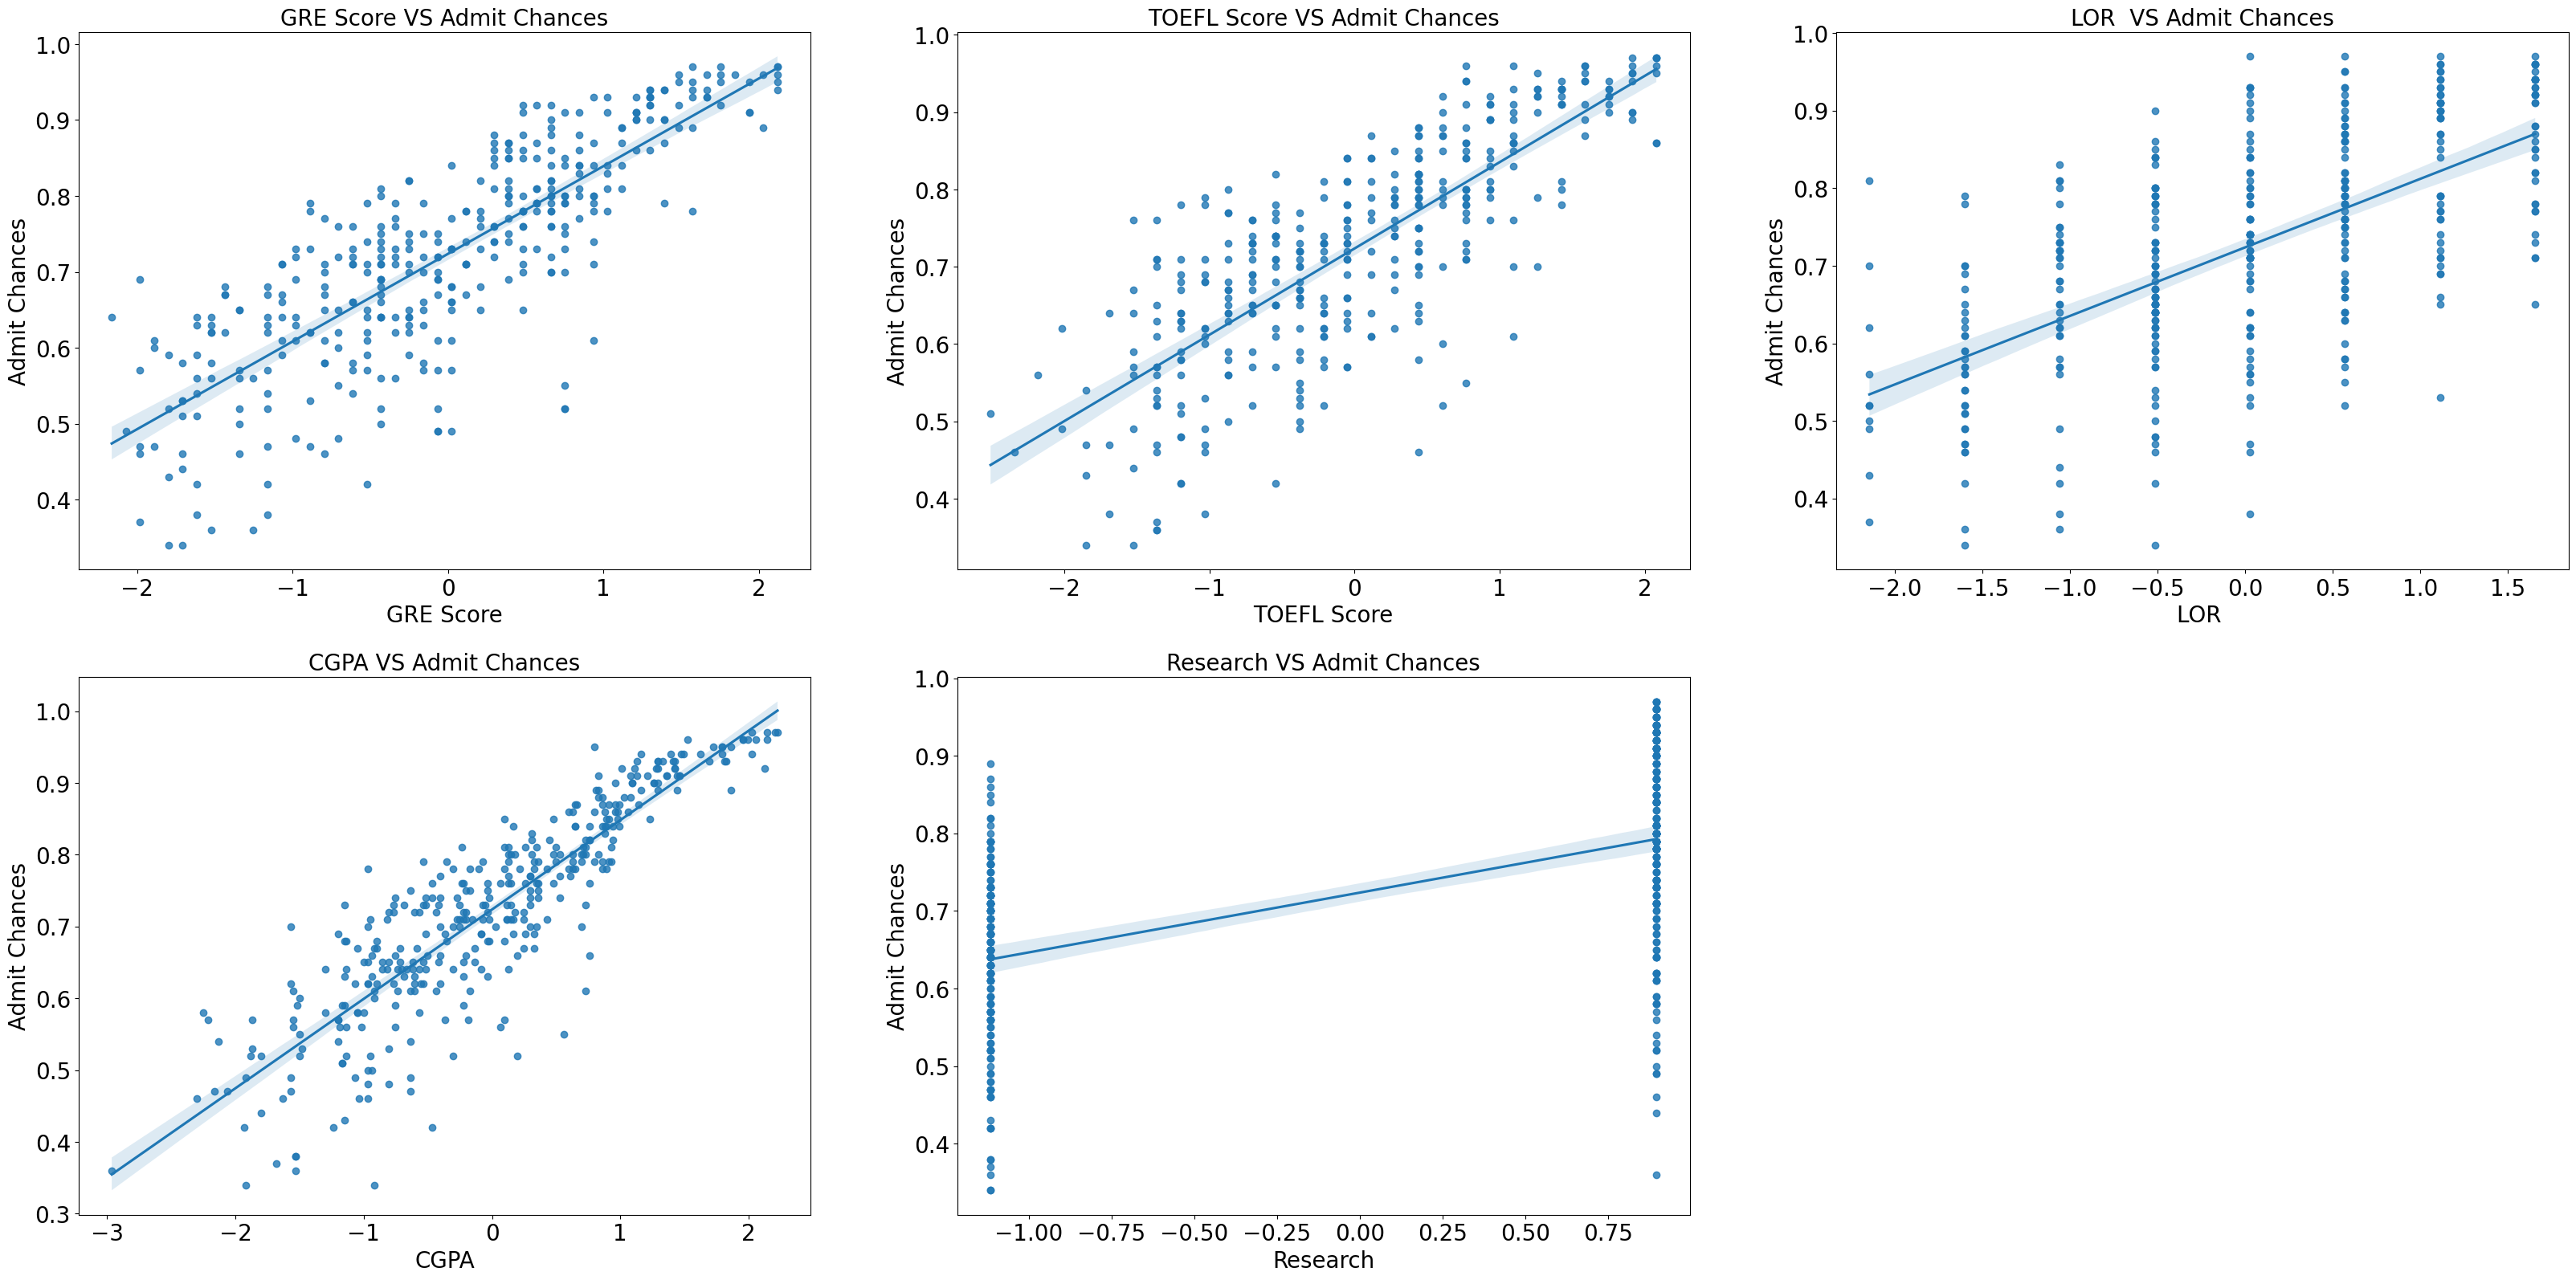

In [65]:
plt.figure(figsize=(40,40))
for idx,i in enumerate(X_train.columns):
    plt.subplot(4,3,idx+1)
    sns.regplot(x=X_train[i], y=y_train)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel(i,fontsize=20)
    plt.ylabel('Admit Chances',fontsize=20)
    plt.title(f"{i} VS Admit Chances",fontsize=20)
plt.show()

**Inference**:

The presence of linear relationships between all independent variables and the target variable suggests adherence to the linearity assumption within the model.

### Multicollinearity

- What is multicollinearity ?
    - Multicollinearity is a phenomenon  in  which independent variables ( predictors) are highly correleated  with each other .
- Why multicollinearity is a problem ?:
    - We can’t estimate  impact ( coefficient) of the feature.
        
        Detailed Explanation:
        
        Because of multicollinearity weight vector changes randomly . Hence, absolute value of weight can't be used for feature importance.
        
    - Multicollinearity makes it challenging to interpret regression models because it becomes difficult to find out which variables are genuinely contributing to predicting the response variable.
        
        Detailed Explanation:
        
        Because of multicollinearity  it is difficult to interpret the individual effects of predictors on the dependent variable.
        
- How do we check multicollinearity:
    - Variance Inflation Factor (VIF) is  used to check multicollinearity
    - Formula:
    $$ VIF_j = \frac{1}{1 - R^2_j} $$

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Calculate variance inflation factor

def calc_vif(df,col):
    df=df.drop(columns=col,axis=1)
    vif=pd.DataFrame()
    vif['features']=df.columns
    vif['VIF value']=[variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    return vif

In [67]:
calc_vif(X_train, [])

,features,VIF value
0,GRE Score,4.545269
1,TOEFL Score,3.540816
2,LOR,1.656289
3,CGPA,4.295245
4,Research,1.519440


**VIF looks fine and hence, we can go ahead with the predictions**

### Homoscedasticity

- What is Homoscedasticity?:
    - The error terms (yi - ŷi) must have constant variance.
    - The variance of the residuals (yi - ŷi)  should be constant across all levels of the independent variables.
- What is Hetroskedasticity?:
    - The presence of non-constant variance in the error terms results in heteroskedasticity.
    - Cause of Heteroskedasticity:  Presence of Outliers.
    - The confidence interval for out-of-sample predictions can tend to be either unrealistically wide or narrow.
    
    - Why Hetroskedasticity is a problem?
        - Inaccurate Model or outliers in the data.
        
    - How do we check hetroskedasticity :
        - We can look at Residual plot → Errors (y - ŷ) vs prediction (ŷ).
        
        ⇒ If heteroskedasticity exists, the plot would exhibit a funnel shape pattern

In [68]:
X_test_sm=sm.add_constant(X_test)
y_pred_sm=sm_regressor.predict(X_test_sm)
y_pred_sm

0      0.916537
1      0.799611
2      0.577434
3      0.715636
4      0.820606
         ...   
120    0.721593
121    0.890781
122    0.726666
123    0.750405
124    0.692866
Length: 125, dtype: float64

In [69]:
residuals=y_test.values - y_pred_sm
residuals

0      0.013463
1      0.040389
2     -0.187434
3      0.054364
4     -0.080606
         ...   
120    0.038407
121    0.009219
122    0.023334
123    0.039595
124    0.047134
Length: 125, dtype: float64

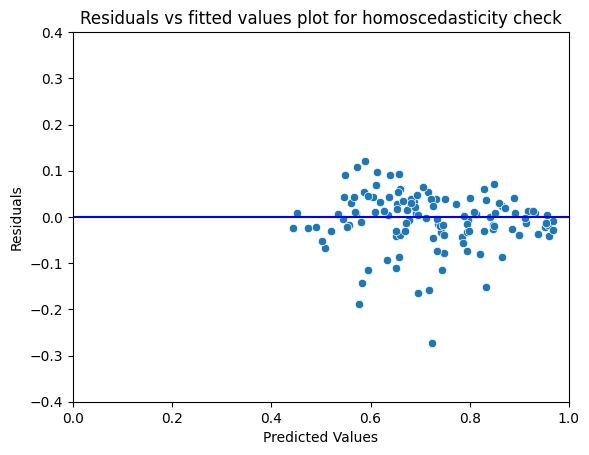

In [70]:
sns.scatterplot(x=y_pred_sm,y=residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.ylim(-0.4,0.4)
plt.xlim(0,1)
sns.lineplot(x=[0,26], y=[0,0], color='blue')
plt.title('Residuals vs fitted values plot for homoscedasticity check')
plt.show()

**Inference**:

- There seems to be very slight difference in variances .
- I will need to employ statistical tests like the Goldfeld-Quandt Test to assess whether the data exhibits homoscedasticity or heteroscedasticity.

**Goldfeld-Quandt Test**:


- ***H0 : Error Terms are Homoscedastic***
- ***Ha: Error Terms are Heteroscedastic***

In [71]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
test=sms.het_goldfeldquandt(residuals,X_test)
name = ['F statistic', 'p-value']
print(lzip(name,test))

[('F statistic', 0.6486495673792608), ('p-value', 0.9480179492395833)]


**Inference**:

Since the p-value exceeds 0.05, we cannot reject the null hypothesis. Consequently, we conclude that the error terms exhibit homoscedasticity.

### Mean of Residuals

In [72]:
residuals_mean=np.mean(residuals)
print(f"Mean of Residuals {residuals_mean}")

Mean of Residuals -0.007759999999999793


**Inference**:

Negative mean of residuals indicates that our model slighlty under-estimating the true values

### Normality of Residuals

- Errors  or  residuals ( yi -  ŷi)  should be normally distributed.
- Used to ensure that there are no outliers present in the data.

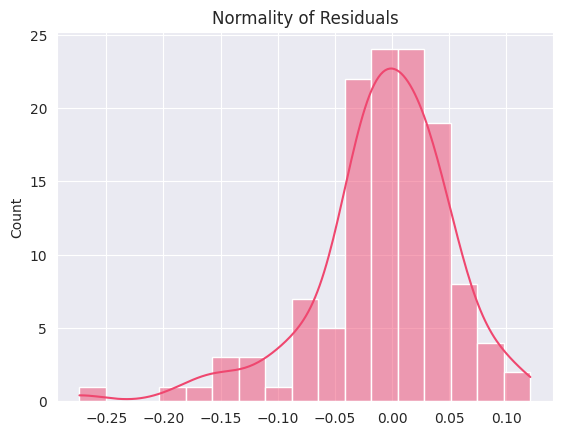

In [73]:
sns.set_style('darkgrid')
sns.histplot(residuals,kde=True,color='#ef476f')
plt.title('Normality of Residuals')
plt.show()


**Inference**:

Residuals seems to be normally distributed with a little left skewed.

## Final Model and Evaluation Metrics

In [74]:
X_train_sm = sm.add_constant(X_train)
sm_regressor = sm.OLS(y_train.values, X_train_sm).fit()
print(sm_regressor.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     341.1
Date:                Tue, 15 Oct 2024   Prob (F-statistic):          6.41e-136
Time:                        06:25:02   Log-Likelihood:                 525.27
No. Observations:                 375   AIC:                            -1039.
Df Residuals:                     369   BIC:                            -1015.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.7237      0.003    233.145      

**Predicting new or unseen data**

In [75]:
X_test_sm=sm.add_constant(X_test)
y_pred_sm=sm_regressor.predict(X_test_sm)
y_pred_sm

0      0.916537
1      0.799611
2      0.577434
3      0.715636
4      0.820606
         ...   
120    0.721593
121    0.890781
122    0.726666
123    0.750405
124    0.692866
Length: 125, dtype: float64

**Visualizing Model**

In [76]:
y_test.shape

(125,)

In [77]:
import plotly.express as px

fig = px.scatter(
     x = y_test, y=y_pred_sm, opacity=0.65,
    trendline='ols', trendline_color_override='darkblue'
)

fig.update_layout(title='y_test vs y_pred',
                   xaxis_title='y_test',
                   yaxis_title='y_pred')
fig.show()

**Evaluation Metrics**

In [78]:
print("R-Squared :", r2_score(y_test, y_pred_sm))
print('Adjusted R-Squared:', adj_r2_score(r2_score(y_test, y_pred_sm),len(y_test), X_test.shape[1]))
print("Mean Absolute Error (MAE) :" , mean_absolute_error(y_test, y_pred_sm))
print("Mean Squared Error (MSE) :" , mean_squared_error(y_test, y_pred_sm))
print("Root Mean Squared Error (RMSE) :" , np.sqrt(mean_squared_error(y_test, y_pred_sm)))

R-Squared : 0.8131103829838255
Adjusted R-Squared: 0.8052578780671795
Mean Absolute Error (MAE) : 0.042800010675069916
Mean Squared Error (MSE) : 0.0036484130537881242
Root Mean Squared Error (RMSE) : 0.060402094779801505


# Insights

- The majority of students at Jamboree boast GRE Scores of 324 or 325, underscoring Jamboree's excellence in GRE coaching.
- A significant portion of students at Jamboree achieves TOEFL scores of 104 or 105, reflecting the institution's proficiency in TOEFL preparation.
- The predominant CGPA among students at Jamboree is 8.5, indicating a noteworthy academic standard within the institution.
- Nearly one-fifth (19.8%) of the students at Jamboree possess LOR ratings of 3, illustrating a significant proportion within the institution's student body.
- A notable proportion of students at Jamboree, specifically 17.8%, exhibit SOP ratings of 3.5, underscoring a significant trend within the institution's student demographics.
- The relationship between the features 'CGPA' and 'Chances of Admit' exhibits a strong linear correlation. As the CGPA increases, there is a noticeable and significant rise in the chances of admission.

- Based on the observed trend, students with a CGPA of 8.5 or higher stand a favorable chance of securing admission from universities rated 3, 4, and 5.

- Conversely, students with CGPA scores between 7 and 8 are likely to encounter reduced admission prospects, particularly from universities rated 1 and 2.

- Student having GRE scores between 330 and 340:
    - Universities having rating 3,4 and 5 : Admit chances > 90 %
    - Univerisities having rating 1 and 2: Admit chances are between 80% and 90 %
 
 
- Students having GRE scores between 320 and 330:
    - Universities having rating 5: Admit chances are between 70% and 95%
    - Universities having rating 3 and 4 : Admit chances are between 50% and 90%
    - Universities having rating 1 and 2: Admit chances are between 50% and 80% %
    
- Students having GRE scores b/w 300 and 320:
    - Universities having rating 5 : Admit chances are between 60% and 80%
    - Universities having rating 3 and 4 : Admit chances are between 40% and 80%
    - Universities having rating 1 and 2 : Admit chances are between 35% and 80%
    
- Student having TOEFL scores between 110 and 120:
    - Universities having rating 5 : Admit chances are between 85% and 100%
    - Universities having rating 4 : Admit chances are between 70 and  95%
    - Universities having rating 3 : Admit chances are between 65% and 90% 
    - Univerisities having rating 1 and 2: Admit chances are between 60% and 90%
    
- Students having TOEFL scores between 100 and 110:
    - Universities having rating 5 : Admit chances are between 75% and 90%
    - Universities having rating 4 : Admit chances are between 50 and  85%
    - Universities having rating 3 : Admit chances are between 40% and 85% 
    - Univerisities having rating 1 and 2: Admit chances are between 35% and 70%
    
   
- Students having TOEFL scores < 100:
     - There are no data points related to the university ratings 4 and 5.
     - Universities having rating 3 : Admit chances are between 40 and  80%
     - Universities having rating 1 and 2 : Admit chances are between 30% and 75% 
     
     
- Student having SOP ratings between 3 and 5:
    - Universities having rating 5 : Admit chances are between 80% and 100%
    - Universities having rating 4 : Admit chances are between 50 and  95%
    - Universities having rating 3 : Admit chances are between 50% and 80% 
    - Universities having rating 2:  Admit chances are between 40% and 80%
    - Universities having rating 1:  Admit chances are between 35% and 70%
    
    
- Students having SOP ratings < 3:
    - Universities having rating 5 : No associated datapoint
    - Universities having rating 4 : Admit chances are between 40% and 90%
    - Univerisities having rating 1, 2 and 3: Admit chances are between 35% and 80%
    
    
- Student having LOR ratings between 3 and 5:
    - Universities having rating 5 : Admit chances are between 60% and 100%
    - Universities having rating 4 : Admit chances are between 60 and  95%
    - Universities having rating 3 : Admit chances are between 40% and 85% 
    - Universities having rating 2:  Admit chances are between 30% and 80%
    - Universities having rating 1:  Admit chances are between 50% and 70%
    
    
- Students having LOR ratings < 3:
    - Universities having rating 5 : No associated datapoint
    - Universities having rating 4 : Admit chances are between 40% and 85%
    - Universities having rating 3 : Admit chances are between 40% and 80%
    - Univerisities having rating 1 and 2 : Admit chances are between 35% and 75%
 

     
    

# Recommendations

1. Based on candidates' preference for mid-tier universities, it's advisable to suggest adding options from both ambitious and safe categories to their application list. This ensures a balanced approach, maximizing chances of acceptance while aiming for academic excellence and security.
2. Jamboree can enhance students' profiles by recommending relevant courses and certifications, while emphasizing the importance of maintaining a high GPA to bolster their chances of acceptance into Ivy League universities. This proactive approach ensures students are equipped with competitive credentials for their desired academic pursuits.
3. In today's competitive landscape, Statement of Purpose (SOP) plays a pivotal role in international admissions. Jamboree can innovate by introducing an AI-based SOP builder, empowering students to craft compelling SOPs that highlight their unique strengths and aspirations. This tool ensures students submit high-quality applications, enhancing their prospects of securing admissions to prestigious universities abroad.
4. Jamboree can offer personalized mentorship programs where students receive guidance from experienced mentors throughout the application process. These mentors can provide valuable insights, review application materials, and offer tailored advice to maximize each student's chances of success.
5. Beyond academic excellence, Jamboree can emphasize holistic skill development by offering workshops, seminars, and extracurricular activities that enhance students' communication, leadership, and problem-solving abilities. This comprehensive approach ensures students are well-rounded and equipped for success in their academic and professional pursuits.





